In [1]:
import pandas as pd
import ast
from tqdm import tqdm  # For progress bar
import numpy as np
from sklearn.preprocessing import StandardScaler


def process_large_dataset(df, list_columns):
    """
    Process large datasets with string-encoded lists efficiently
    """
    # Create a new dataframe for expanded columns
    expanded_df = df.drop(columns=list_columns).copy()
    
    # Process each list column
    for col in tqdm(list_columns, desc="Processing columns"):
        # Get the first row to determine the list length
        first_row_list = ast.literal_eval(df[col].iloc[0])
        num_elements = len(first_row_list)
        
        # Pre-allocate numpy arrays for better performance
        expanded_values = np.zeros((len(df), num_elements))
        
        # Process chunks of the dataframe
        chunk_size = 1000
        for start_idx in tqdm(range(0, len(df), chunk_size), desc=f"Processing {col}"):
            end_idx = min(start_idx + chunk_size, len(df))
            chunk = df[col].iloc[start_idx:end_idx]
            
            # Process each row in the chunk
            for i, row in enumerate(chunk):
                try:
                    values = ast.literal_eval(row)
                    expanded_values[start_idx + i] = values
                except (ValueError, SyntaxError) as e:
                    print(f"Error processing row {start_idx + i} in column {col}: {e}")
                    expanded_values[start_idx + i] = np.nan
        
        # Add the expanded columns to the dataframe
        for i in range(num_elements):
            expanded_df[f'{col}_{i+1}'] = expanded_values[:, i]
            
        scaler = StandardScaler()
        normalized_data = scaler.fit_transform(expanded_df)

        # Convert back to DataFrame if needed
        normalized_df = pd.DataFrame(
                        normalized_data, 
                        columns=expanded_df.columns, 
                        index=expanded_df.index
                        )
    return normalized_df


path = "/home/richtsai1103/CRL/src/results/HalfCheetah-v5/ppo_20241212_020732/selected_steps.csv"
df = pd.read_csv(path)
list_columns = ['current_state', 'current_action', 'prev_state', 'prev_action']
expanded_df = process_large_dataset(df, list_columns)
expanded_df

Processing columns: 100%|██████████| 4/4 [00:00<00:00, 16.26it/s]


,global_step,episode,current_reward,done,prev_reward,current_state_1,current_state_2,current_state_3,current_state_4,current_state_5,...,prev_state_14,prev_state_15,prev_state_16,prev_state_17,prev_action_1,prev_action_2,prev_action_3,prev_action_4,prev_action_5,prev_action_6
0,-1.731185,-1.414214,-1.323091,0.0,-0.950471,-0.272576,-1.701001,-1.269941,0.582522,0.529642,...,0.578668,-1.194030,0.184086,1.209419,1.373783,0.020068,0.397226,-0.982029,-0.850026,0.350307
1,-1.729453,-0.707107,-1.037890,0.0,-1.462812,1.326739,1.471474,-0.470064,0.240357,-0.588327,...,-0.841225,0.254198,-0.072943,-1.191217,-0.759454,0.762799,-0.294504,0.181151,0.637417,-0.484872
2,-1.727721,0.000000,-0.591575,0.0,-1.047586,-1.205878,-0.222795,1.032082,-0.936699,-1.515665,...,-0.530839,0.074299,0.291555,1.796288,-1.685172,-0.093831,-0.419836,0.178053,0.884844,0.442093
3,-1.725989,0.707107,-1.155956,0.0,0.432861,1.549789,-0.049213,-0.239077,0.408457,1.725231,...,0.764318,-0.612568,-0.861120,-0.273492,-0.909154,0.289674,0.079208,-0.285230,-0.216809,-0.260399
4,-1.724257,1.414214,-1.972636,0.0,-1.177665,1.595479,-1.748685,1.262667,1.654896,1.595034,...,0.120690,0.567307,0.152689,0.120595,-1.205507,0.430454,-1.441041,-0.023542,0.807343,0.345193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.724257,-1.414214,-0.702189,0.0,-0.385321,-0.112793,-0.241961,-1.271933,0.789788,0.271121,...,0.309697,-1.059599,-0.465702,-1.631986,1.771411,0.960663,0.157740,-1.858215,-1.959152,-1.300859
1996,1.725989,-0.707107,0.436071,0.0,0.703060,0.297418,0.972961,-1.403345,1.337132,-0.179916,...,0.440128,-1.856293,0.057859,-1.175788,1.683922,0.596628,-0.412273,-0.780045,-1.654445,-1.033115
1997,1.727721,0.000000,0.079706,0.0,-0.390635,-1.291950,0.211660,-1.489609,0.343988,1.146782,...,0.053784,-1.027349,-0.686377,0.131564,2.379497,0.831690,-1.487757,-0.477734,-2.493255,0.348237
1998,1.729453,0.707107,0.862449,0.0,1.788566,-0.064739,-1.421626,-0.796399,1.545395,0.548863,...,0.640707,0.296109,-1.834003,-0.011890,-0.740945,-0.635055,-0.032840,0.616932,0.333908,0.514703


In [2]:
expanded_df = expanded_df.iloc[:,2:]
expanded_df

,current_reward,done,prev_reward,current_state_1,current_state_2,current_state_3,current_state_4,current_state_5,current_state_6,current_state_7,...,prev_state_14,prev_state_15,prev_state_16,prev_state_17,prev_action_1,prev_action_2,prev_action_3,prev_action_4,prev_action_5,prev_action_6
0,-1.323091,0.0,-0.950471,-0.272576,-1.701001,-1.269941,0.582522,0.529642,0.389324,-0.445409,...,0.578668,-1.194030,0.184086,1.209419,1.373783,0.020068,0.397226,-0.982029,-0.850026,0.350307
1,-1.037890,0.0,-1.462812,1.326739,1.471474,-0.470064,0.240357,-0.588327,0.316577,-0.606991,...,-0.841225,0.254198,-0.072943,-1.191217,-0.759454,0.762799,-0.294504,0.181151,0.637417,-0.484872
2,-0.591575,0.0,-1.047586,-1.205878,-0.222795,1.032082,-0.936699,-1.515665,-0.338085,-1.099147,...,-0.530839,0.074299,0.291555,1.796288,-1.685172,-0.093831,-0.419836,0.178053,0.884844,0.442093
3,-1.155956,0.0,0.432861,1.549789,-0.049213,-0.239077,0.408457,1.725231,1.540156,-0.175788,...,0.764318,-0.612568,-0.861120,-0.273492,-0.909154,0.289674,0.079208,-0.285230,-0.216809,-0.260399
4,-1.972636,0.0,-1.177665,1.595479,-1.748685,1.262667,1.654896,1.595034,-1.220595,1.633930,...,0.120690,0.567307,0.152689,0.120595,-1.205507,0.430454,-1.441041,-0.023542,0.807343,0.345193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.702189,0.0,-0.385321,-0.112793,-0.241961,-1.271933,0.789788,0.271121,0.994129,-0.222410,...,0.309697,-1.059599,-0.465702,-1.631986,1.771411,0.960663,0.157740,-1.858215,-1.959152,-1.300859
1996,0.436071,0.0,0.703060,0.297418,0.972961,-1.403345,1.337132,-0.179916,1.420869,1.672574,...,0.440128,-1.856293,0.057859,-1.175788,1.683922,0.596628,-0.412273,-0.780045,-1.654445,-1.033115
1997,0.079706,0.0,-0.390635,-1.291950,0.211660,-1.489609,0.343988,1.146782,1.203936,-0.213643,...,0.053784,-1.027349,-0.686377,0.131564,2.379497,0.831690,-1.487757,-0.477734,-2.493255,0.348237
1998,0.862449,0.0,1.788566,-0.064739,-1.421626,-0.796399,1.545395,0.548863,0.813541,-1.131484,...,0.640707,0.296109,-1.834003,-0.011890,-0.740945,-0.635055,-0.032840,0.616932,0.333908,0.514703


In [3]:
expanded_df.describe()

,current_reward,done,prev_reward,current_state_1,current_state_2,current_state_3,current_state_4,current_state_5,current_state_6,current_state_7,...,prev_state_14,prev_state_15,prev_state_16,prev_state_17,prev_action_1,prev_action_2,prev_action_3,prev_action_4,prev_action_5,prev_action_6
count,2.000000e+03,2000.0,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,...,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2.000000e+03,2.000000e+03
mean,-8.526513e-17,0.0,4.263256e-17,4.618528e-17,2.664535e-17,-2.398082e-17,3.552714e-17,2.486900e-17,1.776357e-17,-1.598721e-17,...,-2.442491e-18,1.776357e-17,1.953993e-17,1.865175e-17,2.842171e-17,1.421085e-17,-2.842171e-17,0.000000,2.842171e-17,-7.105427e-18
std,1.000250e+00,0.0,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,...,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250,1.000250e+00,1.000250e+00
min,-3.159540e+00,0.0,-2.836834e+00,-1.719902e+00,-1.799035e+00,-1.693454e+00,-1.732168e+00,-1.692282e+00,-1.731388e+00,-1.799933e+00,...,-2.776529e+00,-1.902085e+00,-2.329566e+00,-2.151681e+00,-3.027226e+00,-2.340127e+00,-3.080680e+00,-3.175836,-3.645785e+00,-2.852391e+00
25%,-7.776617e-01,0.0,-7.647043e-01,-8.680618e-01,-8.403434e-01,-8.914096e-01,-8.389194e-01,-8.473128e-01,-8.782975e-01,-8.188486e-01,...,-7.114300e-01,-6.995320e-01,-5.220458e-01,-6.719594e-01,-7.029762e-01,-8.563726e-01,-6.554367e-01,-0.737379,-6.399125e-01,-6.483655e-01
50%,-3.747250e-02,0.0,-3.289775e-02,9.230417e-03,-5.495064e-03,-8.731252e-04,-9.868278e-03,-2.039891e-02,2.600902e-02,1.376590e-03,...,9.113916e-02,-6.860761e-02,-1.935962e-01,-9.111079e-02,-7.080107e-02,-1.024968e-01,-1.035166e-02,-0.100201,1.379701e-02,-4.731550e-02
75%,7.100988e-01,0.0,7.245875e-01,8.583979e-01,8.790374e-01,8.799081e-01,8.843019e-01,8.566383e-01,8.706391e-01,8.498013e-01,...,7.443171e-01,3.197495e-01,2.650268e-01,6.007070e-01,6.837683e-01,8.882571e-01,6.040235e-01,0.784679,6.807476e-01,5.517533e-01
max,2.467134e+00,0.0,2.433273e+00,1.705260e+00,1.700295e+00,1.727374e+00,1.718994e+00,1.742070e+00,1.712394e+00,1.726186e+00,...,2.160397e+00,2.280260e+00,2.772387e+00,2.566913e+00,3.267470e+00,2.402937e+00,3.886648e+00,3.178866,2.544974e+00,4.386915e+00


In [4]:
expanded_df = expanded_df.drop('done', axis=1)

In [5]:
expanded_df

,current_reward,prev_reward,current_state_1,current_state_2,current_state_3,current_state_4,current_state_5,current_state_6,current_state_7,current_state_8,...,prev_state_14,prev_state_15,prev_state_16,prev_state_17,prev_action_1,prev_action_2,prev_action_3,prev_action_4,prev_action_5,prev_action_6
0,-1.323091,-0.950471,-0.272576,-1.701001,-1.269941,0.582522,0.529642,0.389324,-0.445409,1.725297,...,0.578668,-1.194030,0.184086,1.209419,1.373783,0.020068,0.397226,-0.982029,-0.850026,0.350307
1,-1.037890,-1.462812,1.326739,1.471474,-0.470064,0.240357,-0.588327,0.316577,-0.606991,-0.390267,...,-0.841225,0.254198,-0.072943,-1.191217,-0.759454,0.762799,-0.294504,0.181151,0.637417,-0.484872
2,-0.591575,-1.047586,-1.205878,-0.222795,1.032082,-0.936699,-1.515665,-0.338085,-1.099147,-1.441308,...,-0.530839,0.074299,0.291555,1.796288,-1.685172,-0.093831,-0.419836,0.178053,0.884844,0.442093
3,-1.155956,0.432861,1.549789,-0.049213,-0.239077,0.408457,1.725231,1.540156,-0.175788,0.888697,...,0.764318,-0.612568,-0.861120,-0.273492,-0.909154,0.289674,0.079208,-0.285230,-0.216809,-0.260399
4,-1.972636,-1.177665,1.595479,-1.748685,1.262667,1.654896,1.595034,-1.220595,1.633930,1.350546,...,0.120690,0.567307,0.152689,0.120595,-1.205507,0.430454,-1.441041,-0.023542,0.807343,0.345193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.702189,-0.385321,-0.112793,-0.241961,-1.271933,0.789788,0.271121,0.994129,-0.222410,-0.572468,...,0.309697,-1.059599,-0.465702,-1.631986,1.771411,0.960663,0.157740,-1.858215,-1.959152,-1.300859
1996,0.436071,0.703060,0.297418,0.972961,-1.403345,1.337132,-0.179916,1.420869,1.672574,1.049125,...,0.440128,-1.856293,0.057859,-1.175788,1.683922,0.596628,-0.412273,-0.780045,-1.654445,-1.033115
1997,0.079706,-0.390635,-1.291950,0.211660,-1.489609,0.343988,1.146782,1.203936,-0.213643,0.575951,...,0.053784,-1.027349,-0.686377,0.131564,2.379497,0.831690,-1.487757,-0.477734,-2.493255,0.348237
1998,0.862449,1.788566,-0.064739,-1.421626,-0.796399,1.545395,0.548863,0.813541,-1.131484,1.584200,...,0.640707,0.296109,-1.834003,-0.011890,-0.740945,-0.635055,-0.032840,0.616932,0.333908,0.514703


In [6]:
expanded_df.to_csv('/home/richtsai1103/CRL/src/results/HalfCheetah-v5/ppo_20241212_020732/expanded_steps.csv', 
          index=False,      # Don't save row indices
          header=True,      # Save column names
          encoding='utf-8'  # Specify encoding
)

In [7]:
expanded_df.values

array([[-1.32309149, -0.9504705 , -0.27257593, ..., -0.98202913,
        -0.85002631,  0.35030747],
       [-1.03789028, -1.46281156,  1.32673935, ...,  0.18115108,
         0.63741722, -0.48487182],
       [-0.59157488, -1.04758612, -1.20587779, ...,  0.17805319,
         0.88484421,  0.4420935 ],
       ...,
       [ 0.07970597, -0.39063545, -1.29195047, ..., -0.47773439,
        -2.49325503,  0.34823685],
       [ 0.86244861,  1.7885664 , -0.06473921, ...,  0.61693248,
         0.3339084 ,  0.51470311],
       [ 0.28255017, -0.99808618,  0.11243964, ...,  0.7352853 ,
        -0.98532978, -2.13665087]])

In [29]:
import pandas as pd
import numpy as np

# Replace 'your_file.csv' with the path to your CSV file
file_path = '/home/richtsai1103/CRL/src/results/Humanoid-v5/ppo_20250207_002508/selected_steps.csv'

# Read the CSV file
data = pd.read_csv(file_path)

# Ensure 'current_state' column is converted from string representation to list if necessary
# Uncomment if the values are stored as strings of lists
data['current_state'] = data['current_state'].apply(eval)

# Convert the lists in 'current_state' to a 2D numpy array
state_array = np.array(data['current_state'].tolist())

# Calculate the variance for each index (column-wise variance)
variances = np.var(state_array, axis=0)



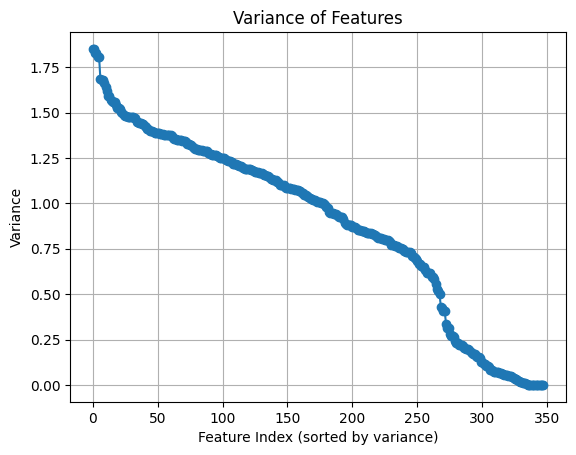

Selected 305 features with variance >= 0.1


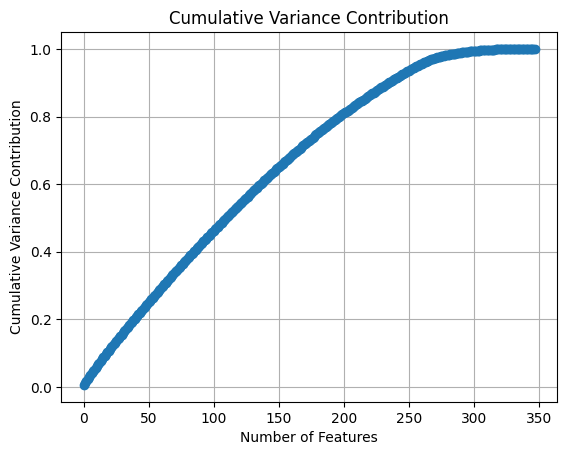

Number of features explaining 95% of variance: 258


In [13]:
import matplotlib.pyplot as plt

# Sort variances in descending order
sorted_variances = np.sort(variances)[::-1]

# Plot the variances to find the "elbow point"
plt.plot(range(len(sorted_variances)), sorted_variances, marker='o')
plt.title('Variance of Features')
plt.xlabel('Feature Index (sorted by variance)')
plt.ylabel('Variance')
plt.grid()
plt.show()

# Option 1: Set a variance threshold
variance_threshold = 0.1
selected_indices = np.where(variances >= variance_threshold)[0]
print(f"Selected {len(selected_indices)} features with variance >= {variance_threshold}")

# Option 2: Cumulative contribution
cumulative_variance = np.cumsum(sorted_variances) / np.sum(sorted_variances)
plt.plot(range(len(cumulative_variance)), cumulative_variance, marker='o')
plt.title('Cumulative Variance Contribution')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Variance Contribution')
plt.grid()
plt.show()


In [17]:
# Retain features explaining 95% of the variance
cumulative_threshold = 0.7
num_features = np.argmax(cumulative_variance >= cumulative_threshold) + 1
print(f"Number of features explaining 70% of variance: {num_features}")

Number of features explaining 70% of variance: 166


In [30]:
import pandas as pd
import numpy as np

# Assuming `state_array` is your 2D NumPy array
# Convert to DataFrame for easier correlation computation
state_df = pd.DataFrame(state_array)

# Calculate the correlation matrix
correlation_matrix = state_df.corr()

# Set a correlation threshold (e.g., 0.9)
correlation_threshold = 0.8

# Find pairs of features with high correlation
high_corr_pairs = [
    (i, j, correlation_matrix.iloc[i, j])
    for i in range(len(correlation_matrix))
    for j in range(i+1, len(correlation_matrix))
    if abs(correlation_matrix.iloc[i, j]) > correlation_threshold
]

# Print highly correlated pairs
print("Highly correlated pairs (absolute correlation > 0.9):")
for i, j, corr_value in high_corr_pairs:
    print(f"Feature {i} and Feature {j} - Correlation: {corr_value:.2f}")

# Optionally drop one feature from each correlated pair
# Example: Drop feature with the lower variance
features_to_drop = set()
for i, j, _ in high_corr_pairs:
    if variances[i] < variances[j]:
        features_to_drop.add(i)
    else:
        features_to_drop.add(j)

# Keep only uncorrelated features
selected_features = [idx for idx in range(state_array.shape[1]) if idx not in features_to_drop]

# Selected features
print(f"Selected {len(selected_features)} features after removing highly correlated ones.")


Highly correlated pairs (absolute correlation > 0.9):
Feature 2 and Feature 50 - Correlation: 0.82
Feature 2 and Feature 52 - Correlation: -0.81
Feature 3 and Feature 6 - Correlation: -0.87
Feature 15 and Feature 126 - Correlation: 0.86
Feature 24 and Feature 180 - Correlation: 0.92
Feature 24 and Feature 186 - Correlation: 0.91
Feature 24 and Feature 192 - Correlation: 0.90
Feature 26 and Feature 29 - Correlation: -0.84
Feature 26 and Feature 176 - Correlation: 0.88
Feature 27 and Feature 177 - Correlation: 0.98
Feature 27 and Feature 243 - Correlation: 0.90
Feature 27 and Feature 249 - Correlation: 0.86
Feature 34 and Feature 200 - Correlation: -0.85
Feature 34 and Feature 202 - Correlation: -0.94
Feature 34 and Feature 206 - Correlation: -0.85
Feature 34 and Feature 208 - Correlation: -0.94
Feature 38 and Feature 217 - Correlation: -0.84
Feature 38 and Feature 221 - Correlation: 0.93
Feature 38 and Feature 223 - Correlation: -0.84
Feature 38 and Feature 227 - Correlation: 0.93
Featu

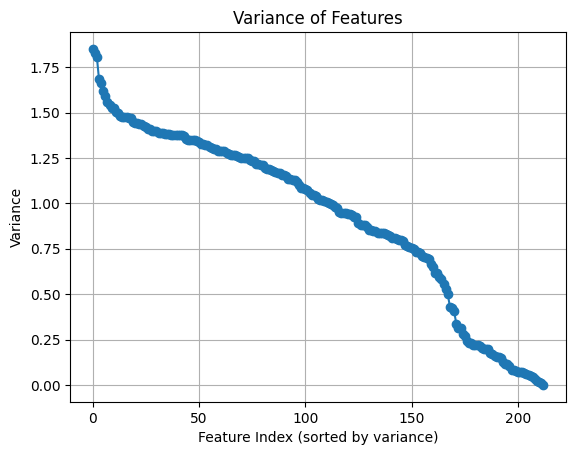

Selected 197 features with variance >= 0.1


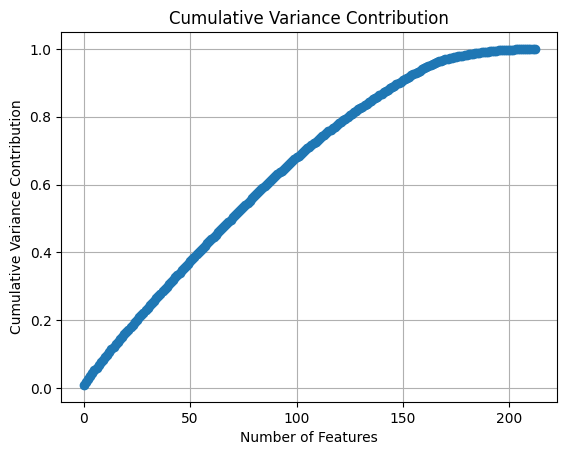

In [31]:
# Sort variances in descending order
variances = variances[selected_features]
sorted_variances = np.sort(variances)[::-1]

# Plot the variances to find the "elbow point"
plt.plot(range(len(sorted_variances)), sorted_variances, marker='o')
plt.title('Variance of Features')
plt.xlabel('Feature Index (sorted by variance)')
plt.ylabel('Variance')
plt.grid()
plt.show()

# Option 1: Set a variance threshold
variance_threshold = 0.1
selected_indices = np.where(variances >= variance_threshold)[0]
print(f"Selected {len(selected_indices)} features with variance >= {variance_threshold}")

# Option 2: Cumulative contribution
cumulative_variance = np.cumsum(sorted_variances) / np.sum(sorted_variances)
plt.plot(range(len(cumulative_variance)), cumulative_variance, marker='o')
plt.title('Cumulative Variance Contribution')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Variance Contribution')
plt.grid()
plt.show()


In [32]:
# Retain features explaining 95% of the variance
cumulative_threshold = 0.7
num_features = np.argmax(cumulative_variance >= cumulative_threshold) + 1
print(f"Number of features explaining 70% of variance: {num_features}")

Number of features explaining 70% of variance: 105


In [1]:


class Node:
    def __init__(self, name, reach=True):
        self.name = name
        self.children = []
        self.reach = reach # 可否抵達

 # 方法一：深度優先搜尋遍歷
def dfs(node, path=None, table=None):
    if path is None:
        path = []
    if table is None:
        table = {}

    # 如果設備無法抵達，則紀錄以下的字樣
    if not node.reach:
        table[node.name] = "此伺服器無法連線"
        return table

    # 將目前的路徑加入路由表中
    table[node.name] = " -> ".join(path + [node.name])

    # 遞迴進行深度優先遍歷
    for child in node.children:
        dfs(child, path + [node.name], table)

    return table

# 方法二：廣度優先搜尋遍歷
from collections import deque
def bfs(node):
    table = {}
    q = deque([(node, [])]) # 創建隊列以存放節點與路徑

    while q:
        current, path = q.popleft()

        # 如果設備無法抵達，則紀錄以下字樣
        if not current.reach:
            table[current.name] = "此伺服器無法連線"
            continue

        # 將目前的路徑加入路由表中
        table[current.name] = " -> ".join(path + [current.name])

        # 加入隊列中以進行廣度優先遍歷
        for child in current.children:
            q.append((child, path + [current.name]))

    return table

# 建立範例
root = Node("Office1")
node_b = Node("Lab1")
node_c = Node("Lab2", reach = False)
node_d = Node("Server3")
node_e = Node("DataCenter4")

root.children = [node_b, node_c]
node_b.children = [node_d, node_e]

routing_dfs = dfs(root)
print("路由表（深度優先）")
for node, path in routing_dfs.items():
    print(f"{node}: {path}")

routing_bfs = bfs(root)
print("路由表（廣度優先）")
for node, path in routing_bfs.items():
    print(f"{node}: {path}")

路由表（深度優先）
Office1: Office1
Lab1: Office1 -> Lab1
Server3: Office1 -> Lab1 -> Server3
DataCenter4: Office1 -> Lab1 -> DataCenter4
Lab2: 此伺服器無法連線
路由表（廣度優先）
Office1: Office1
Lab1: Office1 -> Lab1
Lab2: 此伺服器無法連線
Server3: Office1 -> Lab1 -> Server3
DataCenter4: Office1 -> Lab1 -> DataCenter4


In [2]:
from collections import deque

class Graph:
    def __init__(self):
        self.adjacency_list = {}

    def add_edge(self, u, v):
        """Add an edge (u <-> v) to the graph (undirected graph)."""
        if u not in self.adjacency_list:
            self.adjacency_list[u] = []
        if v not in self.adjacency_list:
            self.adjacency_list[v] = []
        self.adjacency_list[u].append(v)
        self.adjacency_list[v].append(u)

def bfs_shortest_path(graph, start):
    """Use BFS to calculate the shortest path from the start node to all other nodes."""
    visited = set()
    distances = {node: float('inf') for node in graph.adjacency_list}  # Default distances
    distances[start] = 0
    queue = deque([start])

    while queue:
        current_node = queue.popleft()

        if current_node in visited:
            continue
        visited.add(current_node)

        # Process neighbors
        for neighbor in graph.adjacency_list[current_node]:
            if neighbor not in visited:
                # Update distance if this path is shorter
                if distances[current_node] + 1 < distances[neighbor]:
                    distances[neighbor] = distances[current_node] + 1
                queue.append(neighbor)

    # Generate the routing table
    routing_table = {}
    for node, distance in distances.items():
        if distance == float('inf'):
            routing_table[node] = "無法到達"
        else:
            routing_table[node] = distance

    return routing_table

# Create the graph topology
network = Graph()
network.add_edge("A", "B")
network.add_edge("A", "C")
network.add_edge("B", "D")
network.add_edge("C", "D")
network.add_edge("C", "E")
network.add_edge("D", "E")
network.add_edge("E", "F")
network.add_edge("B", "F")  # Another connection

# Calculate the routing table
root_node = "A"
routing_table = bfs_shortest_path(network, root_node)

# Output the routing table
print("路由表 (BFS)：")
for device, distance in routing_table.items():
    print(f"{device}: {distance}")


路由表 (BFS)：
A: 0
B: 1
C: 1
D: 2
E: 2
F: 2


In [4]:
import heapq

class Graph:
    def __init__(self):
        self.adjacency_list = {}

    def add_edge(self, u, v):
        """Add an edge (u <-> v) to the graph (undirected graph)."""
        if u not in self.adjacency_list:
            self.adjacency_list[u] = []
        if v not in self.adjacency_list:
            self.adjacency_list[v] = []
        self.adjacency_list[u].append(v)
        self.adjacency_list[v].append(u)  # Since it's an undirected graph

def dijkstra_shortest_path(graph, start):
    """Calculate shortest paths from the start node to all other nodes."""
    distances = {node: float('inf') for node in graph.adjacency_list}
    distances[start] = 0
    priority_queue = [(0, start)]
    routing_table = {}

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        # Skip if a better path has already been found
        if current_distance > distances[current_node]:
            continue

        # Update the routing table
        routing_table[current_node] = current_distance

        # Process neighbors
        for neighbor in graph.adjacency_list[current_node]:
            distance = current_distance + 1  # Since all weights are 1

            # If a shorter path to the neighbor is found, update distances and enqueue
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

    # Handle unreachable nodes
    for node in distances:
        if distances[node] == float('inf'):
            routing_table[node] = "無法到達"

    return routing_table

# Create the graph
network = Graph()
network.add_edge("A", "B")
network.add_edge("A", "C")
network.add_edge("B", "D")
network.add_edge("C", "D")
network.add_edge("C", "E")
network.add_edge("D", "E")
network.add_edge("E", "F")
network.add_edge("B", "F")  # Additional connection

# Compute the routing table
root_node = "A"
routing_table = dijkstra_shortest_path(network, root_node)

# Output the routing table
print("路由表：")
for device, path in routing_table.items():
    print(f"{device}: {path}")


路由表：
A: 0
B: 1
C: 1
D: 2
E: 2
F: 2


In [12]:
import heapq

class Graph:
    def __init__(self):
        self.adjacency = {}

    def add(self, u, v):
        if u not in self.adjacency:
            self.adjacency[u] = []
        if v not in self.adjacency:
            self.adjacency[v] = []
        self.adjacency[u].append(v)
        self.adjacency[v].append(u)

def dijkstra(graph, start):
    dist = {node: float('inf') for node in graph.adjacency}
    dist[start] = 0
    q = [(0, start)]
    table = {}

    while q:
        current_dist, current_node = heapq.heappop(q)
        if current_dist > dist[current_node]:
            continue

        table[current_node] = current_dist

        for neighbor in graph.adjacency[current_node]:
            distance = current_dist + 1
            if distance < dist[neighbor]:
                dist[neighbor] = distance
                heapq.heappush(q, (distance, neighbor))

    for node in dist:
        if dist[node] == float('inf'):
            table[node] = "此伺服器需要校正連線"
    return table

from collections import deque
def bfs(graph, start):
    visited = set()
    dist = {node: float('inf') for node in graph.adjacency}
    dist[start] = 0
    q = deque([start])

    while q:
        current_node = q.popleft()
        if current_node in visited:
            continue
        visited.add(current_node)
        for neighbor in graph.adjacency[current_node]:
            if neighbor not in visited:
                if dist[current_node] + 1 < dist[neighbor]:
                    dist[neighbor] = dist[current_node] + 1
                q.append(neighbor)
    table = {}
    for node, distance in dist.items():
        if distance == float('inf'):
            table[node] = "此伺服器需要校正連線"
        else:
            table[node] = distance
    return table

# 
network = Graph()
network.add("MainServerA", "LabB")
network.add("MainServerA", "DataCenterC")
network.add("LabB", "OfficeD")
network.add("DataCenterC", "OfficeD")
network.add("DataCenterC", "LabE")
network.add("OfficeD", "LabE")
network.add("LabE", "OfficeF")
network.add("LabB", "OfficeF")

root = "MainServerA"
table = bfs(network, root)
print("路由表(BFS)：")
for node, path in table.items():
    print(f"{node}: {path}")

table = dijkstra(network, root)
print("路由表(Dijkstra)：")
for node, path in table.items():
    print(f"{node}: {path}")

路由表(BFS)：
MainServerA: 0
LabB: 1
DataCenterC: 1
OfficeD: 2
LabE: 2
OfficeF: 2
路由表(Dijkstra)：
MainServerA: 0
DataCenterC: 1
LabB: 1
LabE: 2
OfficeD: 2
OfficeF: 2


In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.utils import dense_to_sparse

class TemporalCausalGraph(nn.Module):
    def __init__(self, state_dim, action_dim, history_length):
        super().__init__()
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.history_length = history_length

        self.num_nodes = history_length * (state_dim + action_dim)  # Total number of nodes

        # Create a valid edge index
        self.edge_index = self.create_edge_index()

        # Graph Neural Network (GNN) layers for causal discovery
        self.gnn1 = GATConv(state_dim + action_dim, 64)
        self.gnn2 = GATConv(64, state_dim)  # Output causal influence per state variable

    def create_edge_index(self):
        """
        Generates a **valid** edge index for the causal graph.
        """
        num_nodes = self.num_nodes  # Total nodes (history_length * (state_dim + action_dim))

        # Create a **fully connected graph within each timestep**
        edge_list = []
        for t in range(self.history_length):
            node_start = t * (self.state_dim + self.action_dim)
            node_end = (t + 1) * (self.state_dim + self.action_dim)
            for i in range(node_start, node_end):
                for j in range(node_start, node_end):
                    edge_list.append([i, j])  # Fully connected per timestep

        edge_index = torch.tensor(edge_list, dtype=torch.long).T  # Convert to PyTorch format
        return edge_index

    def forward(self, state_seq, action_seq):
        """
        Compute a Temporal Causal Graph (TCG) from past state-action sequences.
        """
        x = torch.cat([state_seq, action_seq], dim=-1)  # Concatenate state & action history
        x = F.relu(self.gnn1(x, edge_index=self.edge_index))  # Apply GNN with proper edge_index
        causal_matrix = torch.sigmoid(self.gnn2(x, edge_index=self.edge_index))  # Output causal dependencies

        return causal_matrix



In [18]:



class RSSM(nn.Module):
    def __init__(self, stoch=30, deter=200, hidden=200, rec_depth=1, history_length=5, action_dim=6):
        super().__init__()
        self.stoch = stoch  # Latent state dimension
        self.deter = deter  # Deterministic hidden state dimension
        self.hidden = hidden  # Hidden layer size
        self.rec_depth = rec_depth  # Recurrent depth
        self.history_length = history_length  # Number of timesteps stored
        self.action_dim = action_dim  # Action dimension

        # Transition function
        input_size = stoch + action_dim  # State + Action as input
        self.state_fc = nn.Linear(input_size, hidden)  # State processing
        self.action_fc = nn.Linear(hidden, hidden)  # Action processing
        self.next_state_fc = nn.Linear(hidden, stoch)  # Output next state

        # Store past states and actions
        self.state_history = []
        self.action_history = []

        # Initialize the Temporal Causal Graph (TCG) module
        self.causal_graph = TemporalCausalGraph(stoch, action_dim, history_length)

    def transition_function(self, prev_state, prev_action):
        """
        Predict the next latent state given the previous state and action.
        """
        x = torch.cat([prev_state, prev_action], dim=-1)  # Concatenate state & action
        x = F.relu(self.state_fc(x))  # Process state
        x = F.relu(self.action_fc(x))  # Process action effect
        next_state = self.next_state_fc(x)  # Predict next state
        return next_state

    def forward(self, prev_state, prev_action):
        next_state = self.transition_function(prev_state, prev_action)  # Use transition function

        # Store history for Temporal Causal Graph (TCG)
        if len(self.state_history) >= self.history_length:
            self.state_history.pop(0)
            self.action_history.pop(0)

        self.state_history.append(prev_state.detach())
        self.action_history.append(prev_action.detach())

        # Compute Temporal Causal Graph when enough history is available
        if len(self.state_history) == self.history_length:
            state_seq = torch.stack(self.state_history, dim=0)  # Stack state history
            action_seq = torch.stack(self.action_history, dim=0)  # Stack action history

            causal_matrix = self.causal_graph(state_seq, action_seq)  # Compute causal dependencies
            next_state = next_state * causal_matrix  # Apply causal mask

        return next_state



In [19]:
import torch
import numpy as np
# from networks import RSSM, TemporalCausalGraph  # Import your modified RSSM and TCG

# Define input dimensions
state_dim = 30  # Assuming 30-dimensional latent state
action_dim = 6  # Assuming 6-dimensional action
history_length = 5  # Length of stored history

# Initialize RSSM
rssm = RSSM(stoch=state_dim, deter=200, hidden=state_dim, history_length=history_length)

# Generate fake data for testing
num_samples = 10
state_sequence = torch.randn(num_samples, state_dim)  # Fake states
action_sequence = torch.randn(num_samples, action_dim)  # Fake actions

# Simulate state transitions
print("=== Running RSSM Forward Pass ===")
for i in range(num_samples - 1):
    prev_state = state_sequence[i]
    prev_action = action_sequence[i]
    
    next_state = rssm(prev_state, prev_action)  # Forward pass through RSSM
    print(f"Step {i}: RSSM Predicted Next State Shape: {next_state.shape}")

# Ensure history is stored
assert len(rssm.state_history) <= history_length, "State history is too long!"
assert len(rssm.action_history) <= history_length, "Action history is too long!"
print("\n✅ History length check passed.")

# Compute the Temporal Causal Graph (TCG)
if len(rssm.state_history) == history_length:
    print("\n=== Computing Temporal Causal Graph ===")
    state_seq = torch.stack(rssm.state_history, dim=0)
    action_seq = torch.stack(rssm.action_history, dim=0)

    causal_graph = rssm.causal_graph(state_seq, action_seq)
    print(f"Causal Graph Shape: {causal_graph.shape}")

    # Ensure the causal graph has the correct shape
    assert causal_graph.shape == (history_length, state_dim), "Causal graph shape mismatch!"
    print("\n✅ Temporal Causal Graph computed successfully.")

# Test counterfactual state generation
print("\n=== Generating Counterfactual States ===")
intervention_idx = 2  # Intervene on the 3rd state variable
new_value = 0.5  # New counterfactual value

counterfactual_state = rssm.state_history[-1].clone()
counterfactual_state[intervention_idx] = new_value  # Apply intervention

counterfactual_next_state = rssm(counterfactual_state, action_sequence[-1])
print(f"Counterfactual Next State Shape: {counterfactual_next_state.shape}")

print("\n✅ Counterfactual state generated successfully.")


=== Running RSSM Forward Pass ===
Step 0: RSSM Predicted Next State Shape: torch.Size([30])
Step 1: RSSM Predicted Next State Shape: torch.Size([30])
Step 2: RSSM Predicted Next State Shape: torch.Size([30])
Step 3: RSSM Predicted Next State Shape: torch.Size([30])


IndexError: Found indices in 'edge_index' that are larger than 4 (got 179). Please ensure that all indices in 'edge_index' point to valid indices in the interval [0, 5) in your node feature matrix and try again.

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions.normal import Normal

# ---------------------------
# 1️⃣ Observation Encoder
# ---------------------------
class Encoder(nn.Module):
    def __init__(self, obs_dim, latent_dim):
        super().__init__()
        self.fc = nn.Linear(obs_dim, latent_dim)
        self.relu = nn.ReLU()
    
    def forward(self, obs):
        return self.relu(self.fc(obs))

# ---------------------------
# 2️⃣ Recurrent State-Space Model (RSSM) for Dreamer
# ---------------------------
class RSSM(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.lstm = nn.LSTM(latent_dim, latent_dim, batch_first=True)
    
    def forward(self, latent_seq):
        lstm_out, _ = self.lstm(latent_seq)
        return lstm_out  # Predicts future latent states

# ---------------------------
# 3️⃣ Policy and Value Networks
# ---------------------------
class PolicyNetwork(nn.Module):
    def __init__(self, latent_dim, action_dim):
        super().__init__()
        self.fc = nn.Linear(latent_dim * 2, action_dim)  # Doubled input size to include imagined states
    
    def forward(self, latent, imagined_latent):
        combined = torch.cat([latent, imagined_latent.mean(dim=0)], dim=-1)  # Aggregate imagined rollouts
        return torch.tanh(self.fc(combined))  # Continuous action space

class ValueNetwork(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.fc = nn.Linear(latent_dim, 1)
    
    def forward(self, latent):
        return self.fc(latent)

# ---------------------------
# 4️⃣ Dreamer Agent with Direct Imagination Influence
# ---------------------------
class DreamerAgent:
    def __init__(self, obs_dim, action_dim, latent_dim=64):
        self.encoder = Encoder(obs_dim, latent_dim)
        self.rssm = RSSM(latent_dim)
        self.policy = PolicyNetwork(latent_dim, action_dim)
        self.value = ValueNetwork(latent_dim)
        
        self.policy_optimizer = optim.Adam(self.policy.parameters(), lr=1e-3)
        self.value_optimizer = optim.Adam(self.value.parameters(), lr=1e-3)
    
    def imagine_rollouts(self, latent_seq):
        imagined_latents = self.rssm(latent_seq)
        return imagined_latents
    
    def select_action(self, latent, imagined_latents):
        return self.policy(latent, imagined_latents)
    
    def update_policy(self, imagined_latents):
        actions = self.policy(imagined_latents[:, 0, :], imagined_latents)  # Use the first latent for decision making
        values = self.value(imagined_latents[:, 0, :])
        loss = -values.mean()  # Maximize value function (policy gradient)
        
        self.policy_optimizer.zero_grad()
        loss.backward(retain_graph=True)  # Retain graph to allow further backward calls
        self.policy_optimizer.step()
    
    def update_value(self, imagined_latents):
        values = self.value(imagined_latents[:, 0, :])
        target_values = torch.zeros_like(values)  # Placeholder for target values
        loss = nn.MSELoss()(values, target_values)
        
        self.value_optimizer.zero_grad()
        loss.backward()
        self.value_optimizer.step()

# ---------------------------
# 5️⃣ Training Loop
# ---------------------------
obs_dim = 10  # Example observation space
action_dim = 4  # Example action space
agent = DreamerAgent(obs_dim, action_dim)

for _ in range(1000):  # Simulated training iterations
    obs = torch.randn(1, obs_dim)  # Simulated observation
    latent = agent.encoder(obs)  # Encode observation
    latent_seq = latent.unsqueeze(0)  # Prepare sequence for RSSM
    imagined_latents = agent.imagine_rollouts(latent_seq)  # Imagination phase
    action = agent.select_action(latent, imagined_latents)  # Select action using imagined states
    agent.update_policy(imagined_latents)  # Train policy
    agent.update_value(imagined_latents)  # Train value function

Original - Perturbation 0.0: Final eval_return = 963.887548828125
Original - Perturbation 0.1: Final eval_return = 952.5658020019531
Original - Perturbation 0.2: Final eval_return = 959.02998046875
Original - Perturbation 0.3: Final eval_return = 882.5131164550781
Original - Perturbation 0.4: Final eval_return = 769.6058227539063
Original - Perturbation 0.5: Final eval_return = 680.8777221679687
Counterfactual (0.01) - Perturbation 0.0: Final eval_return = 955.2313171386719
Counterfactual (0.01) - Perturbation 0.1: Final eval_return = 948.5383056640625
Counterfactual (0.01) - Perturbation 0.2: Final eval_return = 951.9482055664063
Counterfactual (0.01) - Perturbation 0.3: Final eval_return = 900.7331787109375
Counterfactual (0.01) - Perturbation 0.4: Final eval_return = 877.5502868652344
Counterfactual (0.01) - Perturbation 0.5: Final eval_return = 734.5976318359375
Counterfactual (0.3) - Perturbation 0.0: Final eval_return = 924.1760314941406
Counterfactual (0.3) - Perturbation 0.1: F

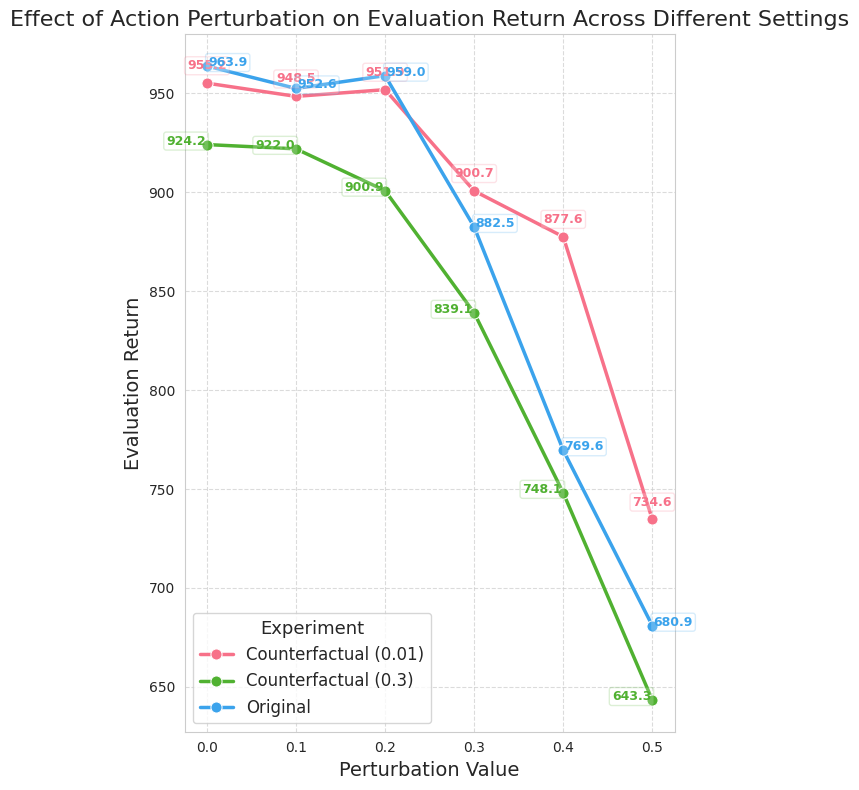

In [18]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_combined_line_graph():
    """
    Create a line graph combining data from multiple experiment paths.
    """
    # Base paths to include
    base_paths = [
        "/home/richtsai1103/CRL/dreamerv3-torch/logdir/dmc_walker_walk/original",
        "/home/richtsai1103/CRL/dreamerv3-torch/logdir/dmc_walker_walk/counterfactual/0.01_0.01",
        "/home/richtsai1103/CRL/dreamerv3-torch/logdir/dmc_walker_walk/counterfactual/0.3_0.3"
    ]
    
    # Create nice labels for each base path
    path_labels = {
        "/home/richtsai1103/CRL/dreamerv3-torch/logdir/dmc_walker_walk/original": "Original",
        "/home/richtsai1103/CRL/dreamerv3-torch/logdir/dmc_walker_walk/counterfactual/0.01_0.01": "Counterfactual (0.01)",
        "/home/richtsai1103/CRL/dreamerv3-torch/logdir/dmc_walker_walk/counterfactual/0.3_0.3": "Counterfactual (0.3)"
    }
    
    # Perturbation values and corresponding directories
    perturb_mapping = {
        0.0: "eval_only_log",  # Special case for 0.0
        0.1: "eval_only_log_action_perturb_0.1",
        0.2: "eval_only_log_action_perturb_0.2",
        0.3: "eval_only_log_action_perturb_0.3",
        0.4: "eval_only_log_action_perturb_0.4",
        0.5: "eval_only_log_action_perturb_0.5"
    }
    
    # Create a DataFrame to store all the results
    all_results = []
    
    # Process each base path
    for base_path in base_paths:
        path_label = path_labels[base_path]
        
        # Process each perturbation value for this path
        for perturb, dir_name in perturb_mapping.items():
            # Construct the full file path
            file_path = os.path.join(base_path, dir_name, "metrics.jsonl")
            
            try:
                # Check if the file exists
                if not os.path.exists(file_path):
                    print(f"Warning: File not found: {file_path}")
                    continue
                    
                # Get the entry with max step
                max_step_data = None
                max_step = -1
                
                # Read the JSONL file line by line
                with open(file_path, 'r') as f:
                    for line in f:
                        if line.strip():  # Skip empty lines
                            try:
                                # Parse each line as a separate JSON object
                                data = json.loads(line)
                                
                                # Check if it has the required data
                                if 'step' in data and 'eval_return' in data:
                                    # Update if this is a later step
                                    if data['step'] > max_step:
                                        max_step = data['step']
                                        max_step_data = data
                            except json.JSONDecodeError:
                                print(f"Warning: Could not parse a line in {file_path}")
                                continue
                
                if max_step_data:
                    # Add to our results list
                    all_results.append({
                        'path': path_label,
                        'perturbation': perturb,
                        'eval_return': max_step_data['eval_return']
                    })
                    print(f"{path_label} - Perturbation {perturb}: Final eval_return = {max_step_data['eval_return']}")
                else:
                    print(f"Warning: No valid data found for {path_label}, perturbation {perturb}")
                
            except Exception as e:
                print(f"Error processing {file_path}: {str(e)}")
    
    if not all_results:
        print("Error: No data could be loaded from any files.")
        return
    
    # Convert to DataFrame
    df = pd.DataFrame(all_results)
    
    # Sort by perturbation for consistent plotting
    df = df.sort_values(['path', 'perturbation'])
    
    # Create the plot
    plt.figure(figsize=(6, 8))
    
    # Set up colors for different paths
    palette = sns.color_palette("husl", n_colors=len(base_paths))
    
    # Create the line plot
    sns.lineplot(
        data=df,
        x='perturbation',
        y='eval_return',
        hue='path',
        palette=palette,
        marker='o',
        markersize=8,
        linewidth=2.5
    )
    
    # Add data labels next to each point with better positioning
    for path_idx, path in enumerate(df['path'].unique()):
        path_data = df[df['path'] == path]
        
        for i, row in path_data.iterrows():
            # Different positioning for each path
            if path_idx == 0:  # First path (likely pink)
                xytext = (0, 10)  # Above
            elif path_idx == 1:  # Second path (likely blue)
                xytext = (-15, 0)  # Left
            else:  # Third path (likely green)
                xytext = (15, 0)  # Right

            plt.annotate(
                f"{row['eval_return']:.1f}",
                (row['perturbation'], row['eval_return']),
                textcoords="offset points",
                xytext=xytext,
                ha='center',
                fontsize=9,
                fontweight='bold',
                color=palette[path_idx],
                bbox=dict(boxstyle="round,pad=0.2", fc="white", ec=palette[path_idx], alpha=0.2)
            )
    
    # Add labels and title
    plt.xlabel('Perturbation Value', fontsize=14)
    plt.ylabel('Evaluation Return', fontsize=14)
    plt.title('Effect of Action Perturbation on Evaluation Return Across Different Settings', fontsize=16)
    
    # Set specific x-ticks
    plt.xticks(sorted(df['perturbation'].unique()))
    
    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Improve legend
    plt.legend(title='Experiment', fontsize=12, title_fontsize=13)
    
    # Save the figure
    output_dir = os.path.dirname(base_paths[0])  # Save in the parent directory
    output_path = os.path.join(output_dir, 'combined_perturbation_analysis.png')
    plt.tight_layout()
    plt.savefig(output_path, dpi=300)
    print(f"Combined line graph saved as '{output_path}'")
    
    # Show the plot
    plt.show()

if __name__ == "__main__":
    # Run the visualization
    create_combined_line_graph()